# `Eda international results 1874-2024`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# para este directorio
df_goals = pd.read_csv("./src/data/goalscorers.csv")
df_results = pd.read_csv("./src/data/results.csv")
df_shootouts= pd.read_csv("./src/data/shootouts.csv")

### limpieza de datos

In [3]:
df_shootouts = df_shootouts.drop(columns="first_shooter")

In [4]:
df_shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [5]:
df_goals.isna().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64

In [36]:
df_goals["scorer"].fillna(0,inplace= True) # limpiamos la columna de scorer y le ponemos a los valores NaN 0 porque No habia goles en esos partidos

In [37]:
df_goals["minute"].fillna('mean',inplace=True)

# Primera pregunta : Cuales son los 5 paises mas goleadores

In [8]:
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
golas_local = df_results.groupby('home_team')['home_score'].sum().reset_index()
goals_visi = df_results.groupby('away_team')['away_score'].sum().reset_index()

In [10]:
total_goles = pd.concat([golas_local, goals_visi])

In [11]:
locales = total_goles[['home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'goals'})
visitantes = total_goles[['away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'goals'})

equipos_total = pd.concat([locales, visitantes]).dropna().reset_index(drop=True)


In [12]:
equipo_mas_goles = equipos_total.groupby('team')['goals'].sum().reset_index()
equipo_mas_goles = equipo_mas_goles.sort_values(by='goals', ascending=False)
print(equipo_mas_goles.head(1)) 

       team   goals
92  England  2350.0


In [13]:
top_5 = equipo_mas_goles.loc[equipo_mas_goles["goals"].nlargest(5).index,["team","goals"]].set_index("team")

In [14]:
top_5

,goals
team,
England,2350.0
Brazil,2278.0
Germany,2268.0
Sweden,2130.0
Argentina,1990.0


In [15]:
team_list = top_5.index.to_list()

In [16]:
team_list

['England', 'Brazil', 'Germany', 'Sweden', 'Argentina']

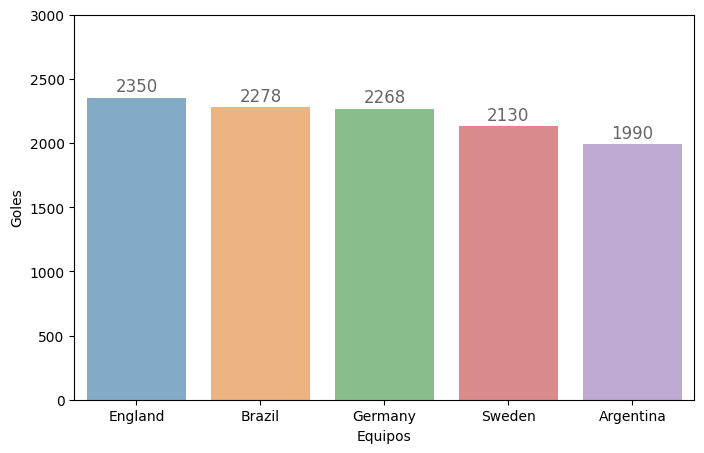

In [17]:
team_list = top_5.index.to_list()

plt.figure(figsize=(8,5))
sns.barplot(top_5,x="team",y="goals", hue= "team",alpha=0.6)
plt.ylim(0,3000)
plt.xlabel("Equipos")
plt.ylabel("Goles")
ax = plt.gca()  # Obtener el eje actual
for bar in ax.patches:  # Iterar sobre todas las barras del gráfico
    height = bar.get_height()  # Altura de la barra (valor de goles)
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posición horizontal (centrado en la barra)
        height + 50,  # Posición vertical (ligeramente por encima de la barra)
        f'{int(height)}',  # Texto con el valor de la barra
        ha='center', fontsize=12, color='k', alpha=0.6
    )



plt.show()

- los equipos mas goleadores son Inglaterra, Brazil, Alemania, Suecia, Argentina

# segunda pregunta

- quienes fueron los 3 mas goleadores

In [18]:
df_goals["scorer"].value_counts().nlargest(5)

scorer
Cristiano Ronaldo     108
Robert Lewandowski     63
Romelu Lukaku          60
Harry Kane             58
Lionel Messi           55
Name: count, dtype: int64

In [19]:
# Obtener los valores más frecuentes en la columna 'scorer'
scorer_counts = df_goals['scorer'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
scorer_counts.columns = ['scorer', 'goals']

# Guardar el resultado en otro DataFrame
df_scorer_counts = scorer_counts

# Mostrar los primeros valores más frecuentes
df_scorer_3 = df_scorer_counts.head(3)

In [20]:
df_scorer_3

,scorer,goals
0,Cristiano Ronaldo,108
1,Robert Lewandowski,63
2,Romelu Lukaku,60


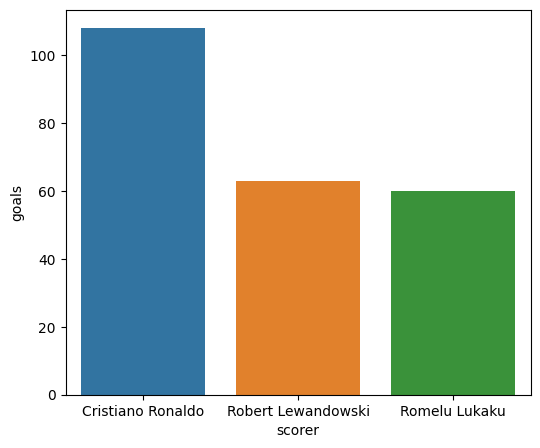

In [21]:
plt.figure(figsize=(6,5))
sns.barplot(df_scorer_3,x="scorer",y= "goals",hue="scorer")

plt.show()

# 3 pregunta cuando se metieron mas goles 

In [22]:
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47912,2024-11-19,Oman,Iraq,0,1,FIFA World Cup qualification,Muscat,Oman,False
47913,2024-11-19,Kuwait,Jordan,1,1,FIFA World Cup qualification,Kuwait City,Kuwait,False
47914,2024-11-19,Bahrain,Australia,2,2,FIFA World Cup qualification,Riffa,Bahrain,False
47915,2024-11-19,Indonesia,Saudi Arabia,2,0,FIFA World Cup qualification,Jakarta,Indonesia,False


In [23]:
df_results["total_goles_dia"] = df_results["home_score"] + df_results["away_score"]

In [24]:
df_results['date'] = pd.to_datetime(df_results['date'])

In [25]:
df_results['year'] = df_results['date'].dt.year

In [26]:
df_goles_por_ano = df_results.groupby('year')['total_goles_dia'].sum().reset_index()

In [27]:
df_goles_por_ano

,year,total_goles_dia
0,1872,0
1,1873,6
2,1874,3
3,1875,4
4,1876,7
...,...,...
148,2020,847
149,2021,3076
150,2022,2437
151,2023,3003


In [28]:
years = df_goles_por_ano['year']  # Años en tu dataframe
goles = df_goles_por_ano['total_goles_dia']
year_destacado = 2020
goles_destacado = goles[years == year_destacado].values[0] 

In [29]:
max_idx = goles.idxmax()
year_max = years[max_idx]
goles_max = goles[max_idx]

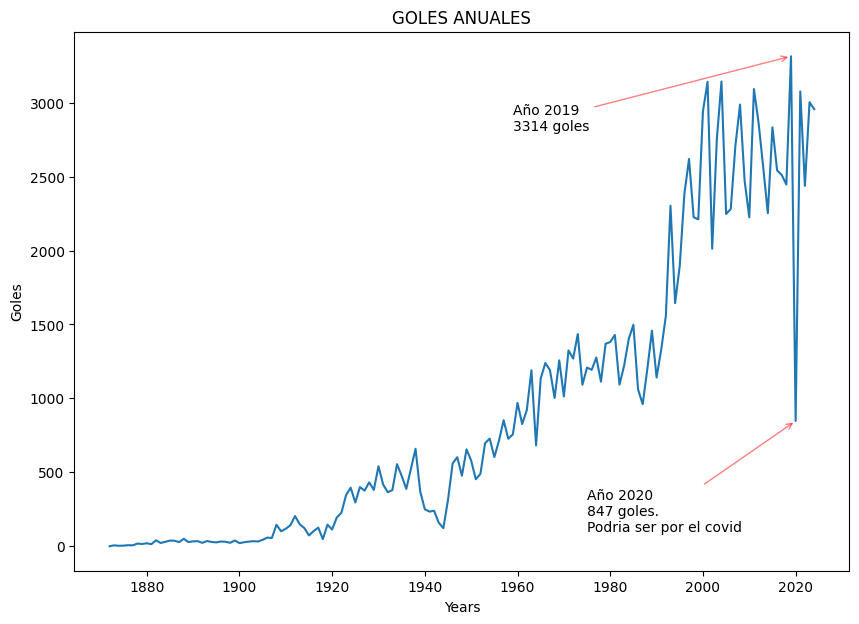

In [30]:
plt.figure(figsize=(10,7))
sns.lineplot(df_goles_por_ano,x="year",y= "total_goles_dia")
plt.xlabel("Years")
plt.ylabel("Goles")
plt.title("GOLES ANUALES")


plt.annotate(f"Año {year_destacado}\n{goles_destacado} goles. \nPodria ser por el covid",
             xy=(year_destacado, goles_destacado),  # Coordenada del punto a marcar
             xytext=(year_destacado - 45, goles_destacado - 750),  # Posición del texto
             arrowprops=dict(color='red', arrowstyle='->', alpha=0.5),  # Flecha estilo -> en rojo
             fontsize=10)

plt.annotate(f"Año {year_max}\n{goles_max} goles",
             xy=(year_max, goles_max),           # Coordenadas del punto máximo
             xytext=(year_max - 60, goles_max - 500),  # Posición del texto (ajustable)
             arrowprops=dict(color='red', arrowstyle='->', alpha= 0.5),  # Flecha roja
             fontsize=10, color='k')
plt.show()

# 4 en que torneo se metieron mas goles

In [31]:
goles_por_torneo = df_results.groupby('tournament')['total_goles_dia'].sum().reset_index()

# Ordenar por la cantidad de goles en orden descendente
goles_por_torneo = goles_por_torneo.sort_values(by='total_goles_dia', ascending=False)

In [32]:
torneos = goles_por_torneo.nlargest(5,"total_goles_dia")



In [33]:
torneos

,tournament,total_goles_dia
85,Friendly,52005
81,FIFA World Cup qualification,23878
162,UEFA Euro qualification,7996
9,African Cup of Nations qualification,5358
48,Copa América,2740


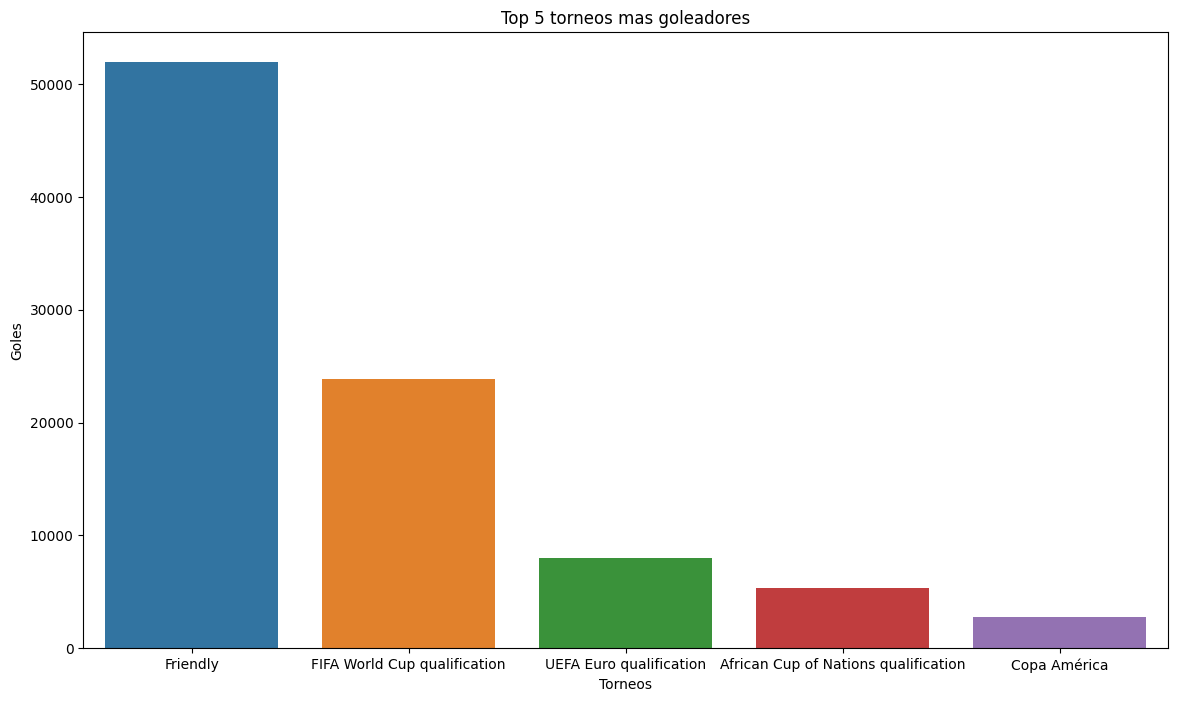

In [34]:
plt.figure(figsize=(14,8))

sns.barplot(torneos, x="tournament", y= "total_goles_dia",hue="tournament")
plt.xlabel("Torneos")
plt.ylabel("Goles")
plt.title("Top 5 torneos mas goleadores")


plt.show()

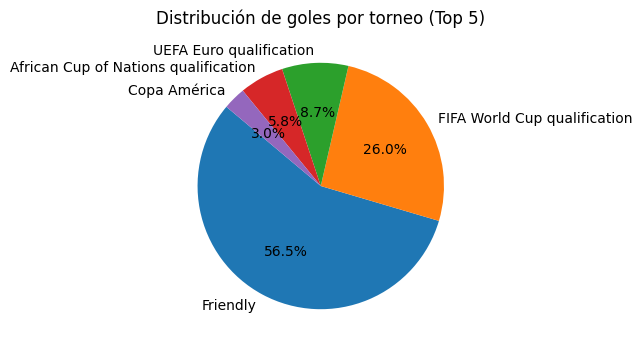

In [35]:
# Datos: nombres de torneos y goles
labels = torneos['tournament']  # Nombres de los torneos
sizes = torneos['total_goles_dia']  # Goles totales en cada torneo

# Crear el gráfico de pie
plt.figure(figsize=(4, 4))  # Tamaño del gráfico
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # Configuración
plt.title("Distribución de goles por torneo (Top 5)")
plt.show()